# Lab7

NAME = GAJULA.KAVYASRI

ROLL NO = CS20B1126

1. Download any Multi Dimensional Classification Dataset from UCI repository.
2. Ignore the class labels and perform Clustering.
3. Experiment with various clustering techniques (Agglomerative , Kmeans...) and number of clusters (3 cluster, 4 clusters, ...)
4. Check and compare the performance with ground truth using Rand Index (RI) and Adjusted Rand Index (RAI) metrics.

In [34]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [35]:
df.shape

(299, 13)

In [36]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [37]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Attribute Information:

Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

In [38]:
df.dropna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [39]:
df.notnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,True,True,True,True,True,True,True,True,True,True,True,True,True
295,True,True,True,True,True,True,True,True,True,True,True,True,True
296,True,True,True,True,True,True,True,True,True,True,True,True,True
297,True,True,True,True,True,True,True,True,True,True,True,True,True


# Data Clustering

In [40]:
X=df.drop(["DEATH_EVENT"],axis=1)
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [41]:
y=df["DEATH_EVENT"]
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

(array([203.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  96.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

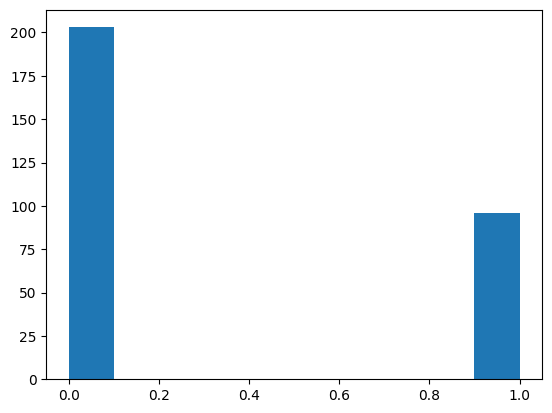

In [42]:
import matplotlib.pyplot as plt
plt.hist(y)

In [43]:
yArray = np.array(y)
yArray

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

# Agglomerative clustering 

In [44]:
from sklearn.cluster import AgglomerativeClustering
k=[2,3,4,5,6]
for i in k:
    cluster = AgglomerativeClustering(n_clusters=i)
    cluster.fit(X)
    predict= cluster.labels_
    print(f'Agglomerative clustering for k={i} is {cluster.labels_[:13]}')

Agglomerative clustering for k=2 is [0 0 0 0 0 0 0 1 0 0 0 0 0]
Agglomerative clustering for k=3 is [0 0 2 0 0 2 2 1 0 0 0 0 2]
Agglomerative clustering for k=4 is [3 3 2 3 1 2 2 0 3 1 1 3 2]
Agglomerative clustering for k=5 is [1 1 2 1 0 2 2 3 1 0 0 1 2]
Agglomerative clustering for k=6 is [1 1 0 1 5 0 0 3 1 2 2 1 0]


In [45]:
#k=2
cluster = AgglomerativeClustering(n_clusters=2)
cluster.fit(X)
predict2 = cluster.labels_ 
cluster.labels_[:13]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
#k=3
cluster = AgglomerativeClustering(n_clusters=3)
cluster.fit(X)
predict3 = cluster.labels_ 
cluster.labels_[:13]

array([0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2], dtype=int64)

In [47]:
#k=4
cluster = AgglomerativeClustering(n_clusters=4)
cluster.fit(X)
predict4 = cluster.labels_ 
cluster.labels_[:13]

array([3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 3, 2], dtype=int64)

In [48]:
#k=5
cluster = AgglomerativeClustering(n_clusters=5)
cluster.fit(X)
predict5 = cluster.labels_ 
cluster.labels_[:13]

array([1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 1, 2], dtype=int64)

In [49]:
#k=6
cluster = AgglomerativeClustering(n_clusters=6)
cluster.fit(X)
predict6 = cluster.labels_ 
cluster.labels_[:13]

array([1, 1, 0, 1, 5, 0, 0, 3, 1, 2, 2, 1, 0], dtype=int64)

# KMeans clustering 

In [50]:
from sklearn.cluster import KMeans
k=[2,3,4,5,6]
for i in k:
    cluster = KMeans(n_clusters=i)
    cluster.fit(X)
    kmeans = cluster.labels_
    print(f'KMeans clustering for k={i} is {cluster.labels_[:13]}')

KMeans clustering for k=2 is [1 1 1 1 0 1 1 0 1 0 0 1 1]
KMeans clustering for k=3 is [0 0 2 0 0 2 2 1 0 1 1 0 2]
KMeans clustering for k=4 is [0 0 3 0 2 3 3 2 0 2 2 0 3]
KMeans clustering for k=5 is [0 0 4 2 0 2 4 1 0 1 1 0 4]
KMeans clustering for k=6 is [3 3 4 0 1 0 4 5 3 1 1 3 4]


In [51]:
from sklearn.cluster import KMeans
#k=2
cluster = KMeans(n_clusters=2)
cluster.fit(X)
kmeans2 = cluster.labels_ 
cluster.labels_[:13]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [52]:
from sklearn.cluster import KMeans
#k=3
cluster = KMeans(n_clusters=3)
cluster.fit(X)
kmeans3 = cluster.labels_ 
cluster.labels_[:13]

array([2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 2, 0])

In [53]:
from sklearn.cluster import KMeans
#k=4
cluster = KMeans(n_clusters=4)
cluster.fit(X)
kmeans4 = cluster.labels_ 
cluster.labels_[:13]

array([1, 1, 2, 1, 3, 2, 2, 3, 1, 3, 3, 1, 2])

In [54]:
from sklearn.cluster import KMeans
#k=5
cluster = KMeans(n_clusters=5)
cluster.fit(X)
kmeans5 = cluster.labels_ 
cluster.labels_[:13]

array([4, 4, 2, 0, 4, 0, 2, 1, 4, 1, 1, 4, 2])

In [55]:
from sklearn.cluster import KMeans
#k=6
cluster = KMeans(n_clusters=6)
cluster.fit(X)
kmeans6 = cluster.labels_ 
cluster.labels_[:13]

array([0, 0, 2, 4, 1, 4, 2, 3, 0, 1, 1, 0, 2])

# Rand-index (RI)

In [66]:
from sklearn.metrics import rand_score

RI = rand_score(yArray, predict2)
print(f'RI for Agglomerative clustering is {RI}')

RI = rand_score(yArray,kmeans2)
print(f'RI for KMeans clustering is {RI}')

RI for Agglomerative clustering is 0.5533209131108168
RI for KMeans clustering is 0.5282260779780477


In [67]:
from sklearn.metrics import rand_score

RI = rand_score(yArray, predict3)
print(f'RI for Agglomerative clustering is {RI}')

RI = rand_score(yArray,kmeans3)
print(f'RI for KMeans clustering is {RI}')

RI for Agglomerative clustering is 0.5270588763439653
RI for KMeans clustering is 0.5099997755381472


In [58]:
from sklearn.metrics import rand_score

RI = rand_score(yArray, predict4)
print(f'RI for Agglomerative clustering is {RI}')

RI = rand_score(yArray,kmeans4)
print(f'RI for KMeans clustering is {RI}')

RI for Agglomerative clustering is 0.4880922987138336
RI for KMeans clustering is 0.5044106754057148


In [59]:
from sklearn.metrics import rand_score

RI = rand_score(yArray, predict5)
print(f'RI for Agglomerative clustering is {RI}')

RI = rand_score(yArray,kmeans5)
print(f'RI for KMeans clustering is {RI}')

RI for Agglomerative clustering is 0.48800251397275035
RI for KMeans clustering is 0.4835357231038585


In [60]:
from sklearn.metrics import rand_score

RI = rand_score(yArray, predict6)
print(f'RI for Agglomerative clustering is {RI}')

RI = rand_score(yArray,kmeans6)
print(f'RI for KMeans clustering is {RI}')

RI for Agglomerative clustering is 0.4841642162914413
RI for KMeans clustering is 0.47906893223496666


# Adjusted rand-index (ARI)

In [61]:
from sklearn.metrics import adjusted_rand_score

ARI = adjusted_rand_score(yArray,predict2 )
print(f'ARI for Agglomerative clustering is {ARI}')

ARI = adjusted_rand_score(yArray, kmeans2)
print(f'ARI for KMeans clustering is {ARI}')

ARI for Agglomerative clustering is 0.00436770164124949
ARI for KMeans clustering is 0.017452908290139624


In [62]:
from sklearn.metrics import adjusted_rand_score
ARI = adjusted_rand_score(yArray,predict3 )
print(f'ARI for Agglomerative clustering is {ARI}')

ARI = adjusted_rand_score(yArray, kmeans3)
print(f'ARI for KMeans clustering is {ARI}')

ARI for Agglomerative clustering is 0.03580153564676605
ARI for KMeans clustering is 0.03343580233361189


In [63]:
ARI = adjusted_rand_score(yArray,predict4 )
print(f'ARI for Agglomerative clustering is {ARI}')

ARI = adjusted_rand_score(yArray, kmeans4)
print(f'ARI for KMeans clustering is {ARI}')

ARI for Agglomerative clustering is 0.016296303872512338
ARI for KMeans clustering is 0.034970808554942036


In [64]:
ARI = adjusted_rand_score(yArray,predict5 )
print(f'ARI for Agglomerative clustering is {ARI}')

ARI = adjusted_rand_score(yArray, kmeans5)
print(f'ARI for KMeans clustering is {ARI}')

ARI for Agglomerative clustering is 0.016251207417856742
ARI for KMeans clustering is 0.016685125704469932


In [65]:
ARI = adjusted_rand_score(yArray,predict6 )
print(f'ARI for Agglomerative clustering is {ARI}')

ARI = adjusted_rand_score(yArray, kmeans6)
print(f'ARI for KMeans clustering is {ARI}')

ARI for Agglomerative clustering is 0.01628244990088678
ARI for KMeans clustering is 0.01638142142000869


# Comparision

By comparing RI and ARI for both Agglomerative Clustering and K_means ,
we observe Agglomerative Clustering has more value in RI.

It varies with ARI comparision slightly 